# Table of contents
1. [Resumo](#Resumo)
2. [Importando bibliotecas](#bibliotecas)
    1. [Importando datasets](#imp_data)
3. [Limpeza de dados](#limp_dados)
    1. [Remoção de Nan](#nan_remove)

# Resumo <a name="Resumo"></a>

A escolha de usar Python para fazer a análise é pela familiaridade com a linguagem, e o uso do jupyter notebook é pelo fato de se poder deixar mais organizado os dados.

O conjunto de dados fornecido será utilizado para análise dos poluentes particulados MP2.5 e PM10


Segundo a EPA, o material particulado (PM) pode ser dividido em duas categorias. O PM2,5 é formado por partículas cujo tamanho chega até 2,5 micrômetros e pode ser encontrado em nevoeiros e na fumaça. Já o PM10, com partículas de tamanho entre 2,5 e 10 micrômetros, pode ser encontrado em regiões próximas a indústrias.

1. The level of the 2012 PM2.5 annual NAAQS is 12.0 micrograms per cubic meter (μg/m3) for primary (health-related) considerations.  The design value for the annual PM2.5 NAAQS is the 3-year average annual mean concentration.  To be comparable to the NAAQS, the design value must be valid (i.e. meet minimum completeness criteria using Federal Reference Method or equivalent data).
2. The level of the 2006 24-hour NAAQS for PM2.5 is 35 micrograms per cubic meter (μg/m3).  The design value for the 24-hour PM2.5 NAAQS is the 3-year average 98th percentile concentration.  To be comparable to the NAAQS, the design value must be valid (i.e. meet minimum completeness criteria using Federal Reference Method or equivalent data). 

3. The level of the 1987 NAAQS for PM10 is 150 micrograms per cubic meter (µg/m3).  The NAAQS metric for the PM10 NAAQS is the 3-year average expected number of exceedances (ENE).  To be comparable to the NAAQS, the design value must be valid (i.e. meet minimum completeness criteria using Federal Reference Method or equivalent data).

Dados extraido de https://www.epa.gov/air-trends/air-quality-design-values

|PM2.5 | Air Quality Index | PM2.5 Health Effects | Precautionary Actions|
|------|------|------|------|
|0 to 12.0|Good 0 to 50|Little to no risk.	|None.|
|12.1 to 35.4|Moderate 51 to 100|Unusually sensitive individuals may experience respiratory symptoms. | Unusually sensitive people should consider reducing prolonged or heavy exertion.|
|35.5 to 55.4|Unhealthy for Sensitive Groups 101 to 150|Increasing likelihood of respiratory symptoms in sensitive individuals, aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly.|People with respiratory or heart disease, the elderly and children should limit prolonged exertion.|
|55.5 to 150.4|Unhealthy 151 to 200|Increased aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly; increased respiratory effects in general population.|People with respiratory or heart disease, the elderly and children should avoid prolonged exertion; everyone else should limit prolonged exertion.|
|150.5 to 250.4|Very Unhealthy 201 to 300|Significant aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly; significant increase in respiratory effects in general population.|People with respiratory or heart disease, the elderly and children should avoid any outdoor activity; everyone else should avoid prolonged exertion.|
|250.5 to 500.4|Hazardous 301 to 500|Serious aggravation of heart or lung disease and premature mortality in persons with cardiopulmonary disease and the elderly; serious risk of respiratory effects in general population.|Everyone should avoid any outdoor exertion; people with respiratory or heart disease, the elderly and children should remain indoors.|

# Importando bibliotecas <a name="bibliotecas"></a>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from windrose import WindroseAxes
import matplotlib.cm as cm
sns.set(style="whitegrid") 

/home/igor/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/home/igor/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/igor/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/home/igor/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3

## Importando datasets <a name="imp_data"></a>

Attribute Information:
* No: row number
* year: year of data in this row
* month: month of data in this row
* day: day of data in this row
* hour: hour of data in this row
* PM2.5: PM2.5 concentration (ug/m^3)
* PM10: PM10 concentration (ug/m^3)
* SO2: SO2 concentration (ug/m^3)
* NO2: NO2 concentration (ug/m^3)
* CO: CO concentration (ug/m^3)
* O3: O3 concentration (ug/m^3)
* TEMP: temperature (degree Celsius)
* PRES: pressure (hPa)
* DEWP: dew point temperature (degree Celsius)
* RAIN: precipitation (mm)
* wd: wind direction
* WSPM: wind speed (m/s)
* station: name of the air-quality monitoring site

In [2]:
data_aotizhongxin = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv")
data_changping = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv")
data_dingling = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv")
data_dongsi = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv")
data_guanyuan = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv")
data_gucheng = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv")
data_huairou = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv")
data_nongzhanguan = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv")
data_shunyi = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv")
data_tiantan = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv")
data_wanliu = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv")
data_wanshouxigong = pd.read_csv("PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv")

# Limpeza de dados. <a name="limp_dados"></a>

Antes de juntar os dataframes mais fácil análizar os Nan values

In [3]:
print("aotizhongxin")
print(round(data_aotizhongxin.isnull().sum()/len(data_aotizhongxin.index), 4)*100)
print("\n")

print("changping")
print(round(data_changping.isnull().sum()/len(data_changping.index), 4)*100)
print("\n")

print("dingling")
print(round(data_dingling.isnull().sum()/len(data_dingling.index), 4)*100)
print("\n")

print("dongsi")
print(round(data_dongsi.isnull().sum()/len(data_dongsi.index), 4)*100)
print("\n")

print("guanyuan")
print(round(data_guanyuan.isnull().sum()/len(data_guanyuan.index), 4)*100)
print("\n")

print("gucheng")
print(round(data_gucheng.isnull().sum()/len(data_gucheng.index), 4)*100)
print("\n")

print("huairou")
print(round(data_huairou.isnull().sum()/len(data_huairou.index), 4)*100)
print("\n")

print("nongzhanguan")
print(round(data_nongzhanguan.isnull().sum()/len(data_nongzhanguan.index), 4)*100)
print("\n")

print("shunyi")
print(round(data_shunyi.isnull().sum()/len(data_shunyi.index), 4)*100)
print("\n")

print("tiantan")
print(round(data_tiantan.isnull().sum()/len(data_tiantan.index), 4)*100)
print("\n")

print("wanliu")
print(round(data_wanliu.isnull().sum()/len(data_wanliu.index), 4)*100)
print("\n")

print("wanshouxigong")
print(round(data_wanshouxigong.isnull().sum()/len(data_wanshouxigong.index), 4)*100)
print("\n")

aotizhongxin
No         0.00
year       0.00
month      0.00
day        0.00
hour       0.00
PM2.5      2.64
PM10       2.05
SO2        2.67
NO2        2.92
CO         5.07
O3         4.90
TEMP       0.06
PRES       0.06
DEWP       0.06
RAIN       0.06
wd         0.23
WSPM       0.04
station    0.00
dtype: float64


changping
No         0.00
year       0.00
month      0.00
day        0.00
hour       0.00
PM2.5      2.21
PM10       1.66
SO2        1.79
NO2        1.90
CO         4.34
O3         1.72
TEMP       0.15
PRES       0.14
DEWP       0.15
RAIN       0.15
wd         0.40
WSPM       0.12
station    0.00
dtype: float64


dingling
No         0.00
year       0.00
month      0.00
day        0.00
hour       0.00
PM2.5      2.22
PM10       1.87
SO2        2.08
NO2        3.52
CO         5.74
O3         3.46
TEMP       0.15
PRES       0.14
DEWP       0.15
RAIN       0.15
wd         0.40
WSPM       0.12
station    0.00
dtype: float64


dongsi
No         0.00
year       0.00
month      0.0

In [4]:
data_aotizhongxin.loc[1507:1511,]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
1507,1508,2013,5,2,19,87.0,179.0,63.0,71.0,1000.0,80.0,20.2,1004.3,6.9,0.0,ESE,2.2,Aotizhongxin
1508,1509,2013,5,2,20,82.0,183.0,61.0,83.0,1000.0,61.0,19.2,1005.4,6.6,0.0,SE,2.8,Aotizhongxin
1509,1510,2013,5,2,21,NaN,183.0,63.0,93.0,1200.0,38.0,18.5,1006.1,6.0,0.0,SE,2.8,Aotizhongxin
1510,1511,2013,5,2,22,166.0,176.0,57.0,103.0,1200.0,24.0,17.9,1006.7,6.7,0.0,ENE,1.4,Aotizhongxin
1511,1512,2013,5,2,23,90.0,138.0,49.0,76.0,800.0,39.0,17.0,1008.2,6.2,0.0,ENE,0.7,Aotizhongxin


Observando os valores ao redor do Nan em PM2.5 não se consegue tirar alguma conclusão de um valor lógico a ser substituido. Pelo fato que a concentração de poluentes depende de vários fatores, como direção do vento (carregando ou removendo os poluentes daquela região), e pressão atmosférica (que influência na direção do vento), bem como a velocidade do vento pode influência na pressão (efeito Bernoulli).

A mesma coisa serve para outras colunas numéricas, existe uma dependência Física entre elas, e uma equação para prever isso está fora de cogitação, pois seria um modelo não linear, que é dependente de várias condições iniciais, que não tenho acesso (trabalho feito por Lorentz, início de estudos de sistemas caóticos foi justamente com previsão meterológica)

Como temos % de Nan values em CO (que é a coluna que mais falta)
* aotizhongxin   $\approx$ 5,7%
* changping      $\approx$ 4,34%
* dingling       $\approx$ 5,74%
* dongsi         $\approx$ 9,12%
* guanyuan       $\approx$ 5%
* gucheng        $\approx$ 4%
* huairou        $\approx$ 4,06%
* nongzhanguan   $\approx$ 3,44%
* shunyi         $\approx$ 6,21%
* tiantan        $\approx$ 3,21%
* wanliu         $\approx$ 5,17%
* wanshouxigong  $\approx$ 3,70%

Isso dá uma média de $\approx$ 4,97% de dados miss nessa coluna (que é a que tem mais valores faltando), e uma substituição pela média não afetaria o conjunto total, pois em torno 95% dos dados ainda estariam preservados.


## Remoção de Nan <a name="nan_remove"></a>

### Remoção de Nan nas colunas numéricas.

In [5]:
col_nan = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "TEMP", "PRES", "DEWP", "RAIN", "WSPM"]
df = [data_aotizhongxin, data_changping, data_dingling, data_dongsi, data_guanyuan,
      data_gucheng, data_huairou, data_nongzhanguan, data_shunyi, data_tiantan, data_wanliu, data_wanshouxigong]

In [6]:
for d in df:
    for col in col_nan:
        d[col].fillna(d[col].median(), inplace=True)

### Remoção de Nan na coluna WD

Existe uma biblioteca em python chamada Windeose, ela é uma ferramenta gráfica que é usado por meterologista que te mostra a distribuição da velocidade do vento e da direção de um local 

Para instalar essa biblioteca só usar

pip install windrose

Para melhor trabalhar com WD bom é converter eles em ângulos, temos

In [7]:
angulos_wd = {"N":360,
              "NNE":22.5,
              "NE":45,
              "ENE":67.5,
              "E":90,
              "ESE":112.5,
              "SE":135,
              "SSE":157.5,
              "S":180,
              "SSW":202.5,
              "SW":225,
              "WSW":247.5,
              "W":270,
              "WNW":292.5,
              "NW":315,
              "NNW":337.5}

In [8]:
data_aotizhongxin['wd'].unique()

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [9]:
for d in df:
    d['wd'] = d['wd'].apply(lambda x: x if pd.isnull(x) else angulos_wd[x])

In [10]:
data_aotizhongxin['wd'].unique()

array([337.5, 360. , 315. ,  22.5,  67.5,  90. ,  45. , 270. , 202.5,
       247.5, 135. , 292.5, 157.5, 112.5, 180. , 225. ,   nan])

In [11]:
data_aotizhongxin[data_aotizhongxin.wd.isna()].head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
6388,6389,2013,11,22,4,82.0,74.0,15.0,75.0,1300.0,42.0,-3.2,1020.5,-4.0,0.0,NaN,0.1,Aotizhongxin
11718,11719,2014,7,2,6,44.0,44.0,2.0,16.0,800.0,105.0,21.5,998.2,21.5,0.1,NaN,0.2,Aotizhongxin
13412,13413,2014,9,10,20,56.0,141.0,13.0,81.0,700.0,99.0,21.7,1008.0,15.8,0.0,NaN,0.0,Aotizhongxin
16748,16749,2015,1,27,20,26.0,42.0,12.0,78.0,1300.0,2.0,14.5,1011.4,3.8,0.0,NaN,1.4,Aotizhongxin
17263,17264,2015,2,18,7,13.0,14.0,12.0,22.0,600.0,60.0,14.5,1011.4,3.8,0.0,NaN,1.4,Aotizhongxin


O primeiro valor nan para aotizhongxin é as 4h, observando como é a distribuição de velocidade de vento e direção nessa hora temos

In [12]:
data_aotizhongxin[data_aotizhongxin.hour==4].groupby("wd").count().idxmax().values[0] 

45.0

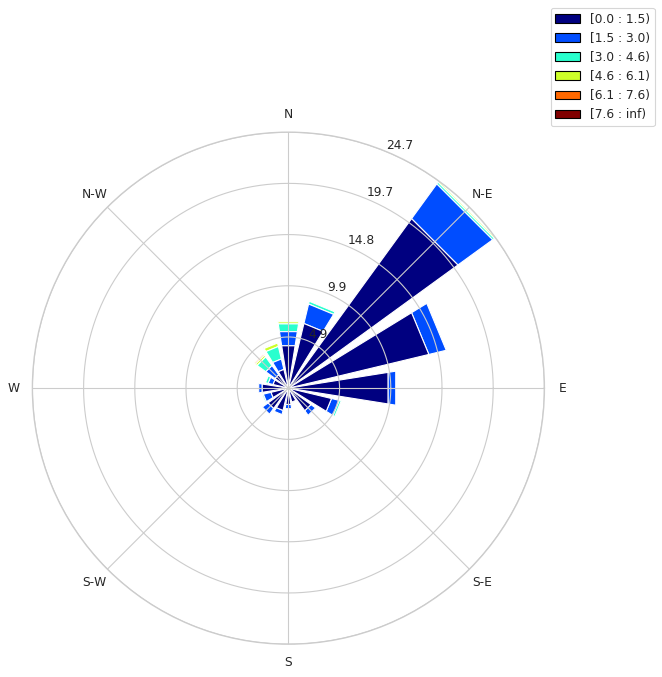

In [13]:
wd = data_aotizhongxin.loc[data_aotizhongxin.hour==4,'wd']
ws = data_aotizhongxin.loc[data_aotizhongxin.hour==4,'WSPM']
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(bbox_to_anchor=(1, 1))

Então observa-se que existe uma predominância de ventos na direção NE.

Para as 20h, que é aonde se tem outro Nan

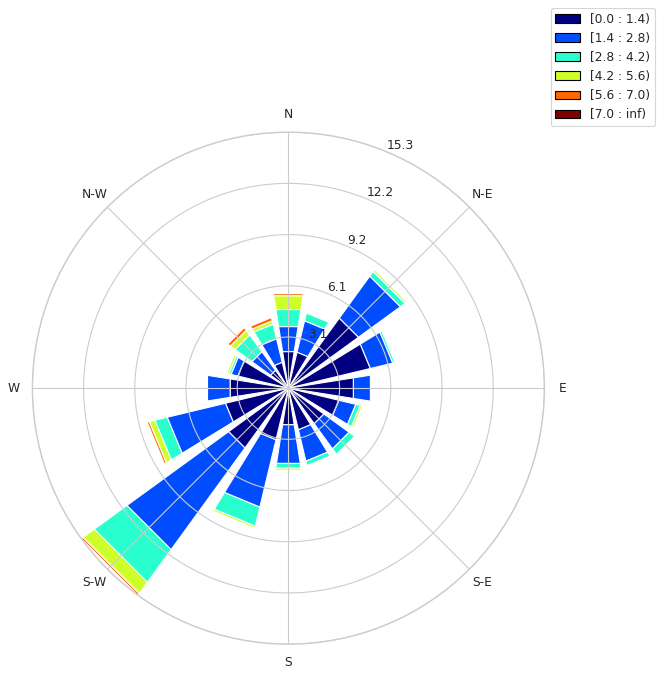

In [14]:
wd = data_aotizhongxin.loc[data_aotizhongxin.hour==20,'wd']
ws = data_aotizhongxin.loc[data_aotizhongxin.hour==20,'WSPM']
ax = WindroseAxes.from_ax()
ax.bar(wd, ws, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.legend(bbox_to_anchor=(1, 1))

Nesse caso observa-se uma predominância de ventos na direção SW, então podemos substituir os valores de NaN pelo máximo de ocorrência no mesmo horario.

In [15]:
for d in df:
    for hour, i in zip(d.loc[d.wd.isna(), 'hour'],
                       d[d.wd.isna()].index):

        most_count = d[d.hour==hour].groupby("wd").count().idxmax().values[0]
        d.loc[i,'wd'] = most_count

## Juntanto todos dataframes

In [16]:
df = [data_aotizhongxin, data_changping, data_dingling, data_dongsi, data_guanyuan,
      data_gucheng, data_huairou, data_nongzhanguan, data_shunyi, data_tiantan, data_wanliu, data_wanshouxigong]
all_data = pd.concat(df,ignore_index=True) #<- index ignorado para não ter repetição de index

A coluna No nesse caso é redundânte, pois pode-se trabalhar com os index.

In [17]:
all_data.drop(columns=['No'],inplace=True)

Analisar se existes valores null ainda

In [18]:
round(all_data.isnull().sum()/len(all_data.index), 4)*100

year       0.0
month      0.0
day        0.0
hour       0.0
PM2.5      0.0
PM10       0.0
SO2        0.0
NO2        0.0
CO         0.0
O3         0.0
TEMP       0.0
PRES       0.0
DEWP       0.0
RAIN       0.0
wd         0.0
WSPM       0.0
station    0.0
dtype: float64

Pode-se ver que todos os Nan foram removidos.

# Exploração de dados.

Primeira análise a ser feita é ver como é a evolução por ano de cada poluente (PM2,5 e PM10) em cada cidade.

## Análise PM2.5

### Análise geral

Primeiro fazendo uma média diária dos poluentes em todas cidades

In [19]:
all_data['date']=pd.to_datetime(all_data[['year', 'month', 'day']])

In [20]:
daily_data = all_data.drop('hour', axis=1).groupby('date').mean()
daily_data

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,,,,,,,,,
2013-03-01,2013,3,1,7.326389,12.586806,9.239583,23.680556,417.013889,67.944879,1.173958,1026.569792,-20.148611,0.000000,219.375000,2.917708
2013-03-02,2013,3,2,31.475694,40.743056,31.671072,56.536402,946.833333,32.625418,0.260417,1026.552778,-16.271875,0.000000,181.875000,1.145139
2013-03-03,2013,3,3,79.291667,111.104167,49.232639,75.753472,1769.232639,22.788194,5.257292,1014.215278,-12.325347,0.000000,216.015625,1.463194
2013-03-04,2013,3,4,22.170139,40.795139,18.771817,42.951803,729.465278,56.833333,9.610764,1017.263194,-12.773264,0.000000,225.468750,2.227083
2013-03-05,2013,3,5,127.395833,159.236111,70.000000,100.565972,2015.017361,79.527778,6.630556,1010.551389,-7.916319,0.000000,137.500000,0.992014
2013-03-06,2013,3,6,203.788194,231.388889,99.321081,124.280916,2771.548611,45.600694,7.293056,1007.146528,-4.805208,0.000000,183.437500,1.072569
2013-03-07,2013,3,7,241.020833,276.100694,83.517361,138.972222,3760.423611,48.187500,9.114236,1001.975694,-2.632986,0.000000,172.890625,1.236458
2013-03-08,2013,3,8,200.406250,246.920139,59.421025,112.632838,2824.774306,92.114583,10.046875,999.106597,-2.046528,0.000000,159.375000,1.809375
2013-03-09,2013,3,9,59.902778,196.645833,27.813975,42.803924,1104.746528,90.173611,7.071875,1004.055556,-11.176042,0.000000,232.031250,3.558681


Para depois fazer uma média semanal

In [21]:
weekly_data = daily_data.resample('W').mean()

In [22]:
weekly_data.head()

,year,month,day,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
date,,,,,,,,,,,,,,,
2013-03-03,2013.0,3.0,2.0,39.364583,54.811343,30.047765,51.990143,1044.359954,41.119497,2.230556,1022.445949,-16.248611,0.000000,205.755208,1.842014
2013-03-10,2013.0,3.0,7.0,127.418155,173.268849,54.256168,86.864985,1994.253968,71.200893,7.921974,1008.608036,-7.972123,0.000000,188.504464,1.878720
2013-03-17,2013.0,3.0,14.0,155.800595,165.898313,54.149802,83.291667,1748.891369,72.194444,6.276538,1013.946478,-3.122867,0.021280,165.156250,1.480060
2013-03-24,2013.0,3.0,21.0,61.516369,77.979167,16.282738,46.082837,883.432540,48.548576,4.453819,1009.503224,-6.526091,0.083978,169.587054,2.288740
2013-03-31,2013.0,3.0,28.0,101.658234,129.341022,31.981422,58.834102,1211.178571,39.839088,6.928819,1012.459077,-5.007341,0.000000,157.064732,1.917163


In [23]:
weekly_data.shape

(210, 15)

In [24]:
weekly_data.drop(columns=['year','month','day'],inplace=True)

/home/igor/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


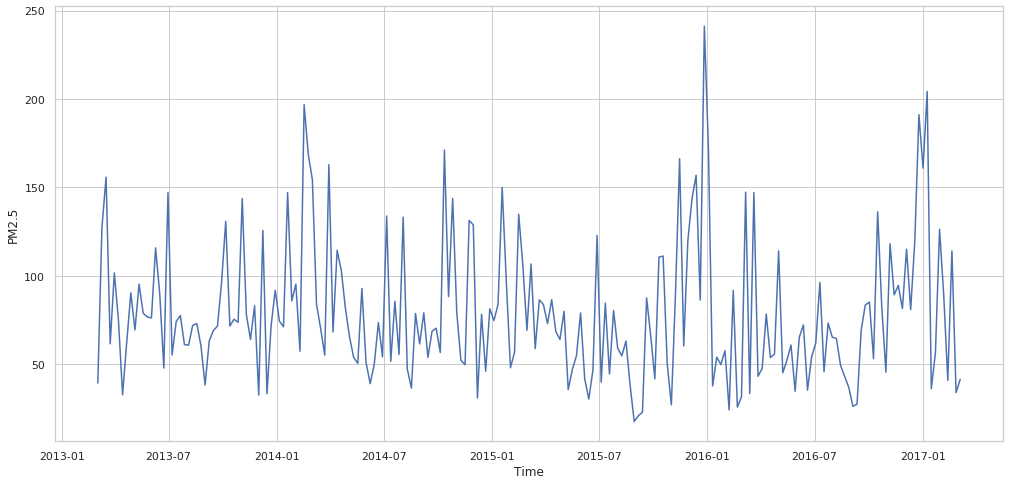

In [25]:
def plot_data(col):
    plt.figure(figsize=(17, 8))
    plt.plot(weekly_data[col])
    plt.xlabel('Time')
    plt.ylabel(col)
            
plot_data("PM2.5")

In [26]:
cols_to_drop = ['PM10','SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']

weekly_data_pm2_5 = weekly_data.drop(cols_to_drop, axis=1)

In [27]:
weekly_data_pm2_5.head()

,PM2.5
date,
2013-03-03,39.364583
2013-03-10,127.418155
2013-03-17,155.800595
2013-03-24,61.516369
2013-03-31,101.658234


In [28]:
from fbprophet import Prophet
import logging
logging.getLogger().setLevel(logging.ERROR)

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [29]:
df = weekly_data_pm2_5.reset_index()
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2013-03-03,39.364583
1,2013-03-10,127.418155
2,2013-03-17,155.800595
3,2013-03-24,61.516369
4,2013-03-31,101.658234


Remover os 30 ultimos dias do conjunto de dados, para ser usado como teste posteriomente, para poder analisar MAPE e MAE.

In [30]:
prediction_size = 30
train_df = df[:-prediction_size]

Prophet é uma biblioteca opensource baseada em scipy que faz análises de predição bem robustas em séries temporais. É uma biblioteca que existe tanto para Python como para R https://facebook.github.io/prophet/docs/quick_start.html

In [31]:
m = Prophet()
m.fit(train_df)

In [32]:
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)

In [33]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-03-03,86.426586,59.899032,151.426123,86.426586,86.426586,18.807806,18.807806,18.807806,18.807806,18.807806,18.807806,0.0,0.0,0.0,105.234392
1,2013-03-10,86.341759,57.052147,147.482589,86.341759,86.341759,14.797923,14.797923,14.797923,14.797923,14.797923,14.797923,0.0,0.0,0.0,101.139682
2,2013-03-17,86.256932,52.291165,143.340306,86.256932,86.256932,11.367447,11.367447,11.367447,11.367447,11.367447,11.367447,0.0,0.0,0.0,97.624379
3,2013-03-24,86.172105,50.091504,140.133243,86.172105,86.172105,7.243370,7.243370,7.243370,7.243370,7.243370,7.243370,0.0,0.0,0.0,93.415475
4,2013-03-31,86.087278,43.008338,130.464089,86.087278,86.087278,2.335992,2.335992,2.335992,2.335992,2.335992,2.335992,0.0,0.0,0.0,88.423270


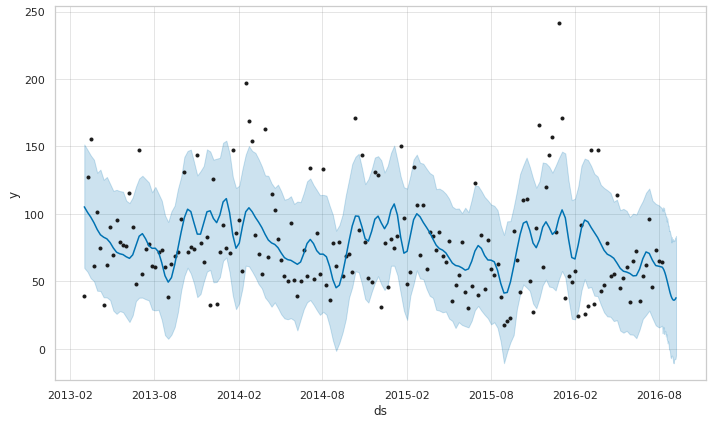

In [34]:
m.plot(forecast);

Os pontos em pretos são os valores reais da série temporal, a linha azul é a reta predita pelo modelo, e a área azul é o erro da medida.

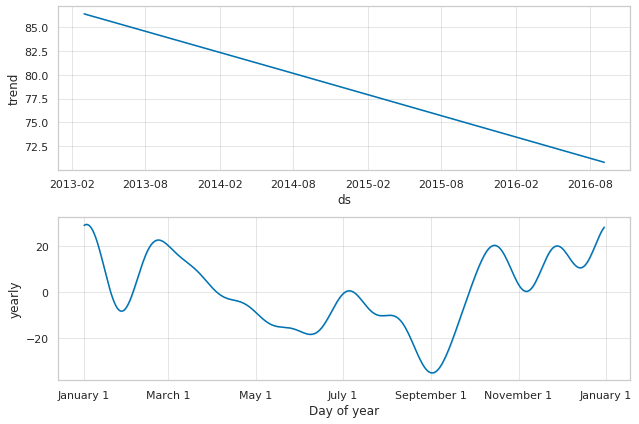

In [40]:
m.plot_components(forecast);

Em trend mostra que não existe uma periodicidade e sim um decaimento nos poluentes que é um bom sinal

yearly mostra a periodicidade anual de poluentes, pode-se ver que começo do ano, final de fevereiro meados de setembro e final de dezembro, existe um aumento desses poluentes. Dezembro e começo do ano esse aumento pode ser devido as férias, ocasionando um aumento de carros circulando.

In [36]:
def make_comparison_dataframe(historical, forecast):
    return forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))

In [37]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.head()

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2013-03-03,105.234392,59.899032,151.426123,39.364583
2013-03-10,101.139682,57.052147,147.482589,127.418155
2013-03-17,97.624379,52.291165,143.340306,155.800595
2013-03-24,93.415475,50.091504,140.133243,61.516369
2013-03-31,88.423270,43.008338,130.464089,101.658234


In [38]:
def calculate_forecast_errors(df, prediction_size):
    
    df = df.copy()
    
    df['e'] = df['y'] - df['yhat']
    df['p'] = 100 * df['e'] / df['y']
    
    predicted_part = df[-prediction_size:]
    
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))
    
    return {'MAPE': error_mean('p'), 'MAE': error_mean('e')}

In [39]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE 14.916671976302068
MAE 4.89340343450718


MAPE (Mean absolute percentage error) nos mostra que modelo pode errar em 14% do valor real.

MAE (Mean absolute error) que o erro está em 4 unidades.

Mostrando assim que é um modelo confiável.

### Análise por cidade

In [ ]:
https://github.com/imartynetz/hackaton_positivo.git